In [374]:
import random
from game import Game, Move, Player

border = []
for i in range(5):
    for j in range(5):
        if i == 0 or i == 4 or j == 0 or j == 4:
            border.append((i, j))
BORDER = (list(set(border)))
print(len(BORDER))

ALL_MOVES = []
for pos in BORDER:
    possible_moves = [Move.TOP, Move.BOTTOM, Move.LEFT, Move.RIGHT]
            
    if pos[0] == 0: possible_moves.remove(Move.LEFT)
    if pos[0] == 4: possible_moves.remove(Move.RIGHT)
    if pos[1] == 0: possible_moves.remove(Move.TOP)
    if pos[1] == 4: possible_moves.remove(Move.BOTTOM)

    for move in possible_moves: ALL_MOVES.append((pos, move))
N_ALL = len(ALL_MOVES)

class RandomPlayer(Player):
    def __init__(self) -> None:
        super().__init__()

    def make_move(self, game: 'Game') -> tuple[tuple[int, int], Move]:

        from_pos = random.choice(BORDER)
        while game.get_board()[from_pos[1], from_pos[0]] == 1 - game.current_player_idx: from_pos = random.choice(BORDER)

        possible_moves = [Move.TOP, Move.BOTTOM, Move.LEFT, Move.RIGHT]
            
        if from_pos[0] == 0: possible_moves.remove(Move.LEFT)
        if from_pos[0] == 4: possible_moves.remove(Move.RIGHT)
        if from_pos[1] == 0: possible_moves.remove(Move.TOP)
        if from_pos[1] == 4: possible_moves.remove(Move.BOTTOM)
        
        move = random.choice(possible_moves)

        return from_pos, move

16


In [375]:
import numpy as np

In [376]:
class ID_generator:
    def __init__(self):
        self.id = -1
    def get_id(self):
        self.id += 1
        return self.id

In [377]:
# i: layer
# j: ramo
# W[0, 0]: dense 25 x 25 = 625 weights = 5 x 5 matrix containing 5 x 5 matrices
# W[0, 1]: vertical conv 5 x n_filter_1 = 5 x n_filter_1 weights = (n_filter_1,) vector containing 5 x 1 matrices
# W[0, 2]: horizontal conv 5 x n_filter_2 = 5 x n_filter_2 weights = (n_filter_2,) vector containing 1 x 5 matrices
# W[0, 3]: conv 3 x 3 x n_filter_3 = 3 x 3 x n_filter_3 weights = (n_filter_3,) vector containing 3 x 3 matrices
# W[0, 3]: conv 2 x 2 x n_filter_4 = 2 x 2 x n_filter_4 weights = (n_filter_4,) vector containing 2 x 2 matrices
#
# W[1, 0]: dense 25 x 64 = 1600 weights = (64,) vector containing 5 x 5 matrices
# W[1, 1]: dense 5 x n_filter_1 x 64 = 320 x n_filter_1 weights = (64,) vector containing 5 x n_filter_1 matrices
# W[1, 2]: dense 5 x n_filter_2 x 64 = 320 x n_filter_2 weights = (64,) vector containing 5 x n_filter_2 matrices
# W[1, 3]: dense 3 x 3 x n_filter_3 x 64 = 576 x n_filter_3 weights = (64,) vector containing 3 x 3 x n_filter_3 matrices
# W[1, 3]: dense 4 x 4 x n_filter_4 x 64 = 1024 x n_filter_4 weights = (64,) vector containing 2 x 2 x n_filter_4 matrices
#
# W[2, 0]: 64 x 64 = 4096 weights = (64,) vector of (64,) vectors
# W[2, 1]: 64 x 64 = 4096 weights = (64,) vector of (64,) vectors
# W[2, 2]: 64 x 64 = 4096 weights = (64,) vector of (64,) vectors
# W[2, 3]: 64 x 64 = 4096 weights = (64,) vector of (64,) vectors
# W[2, 4]: 64 x 64 = 4096 weights = (64,) vector of (64,) vectors
#
# X: input (5x5)
#
# H00 = [[sum(X * W[0, 0][i, j]) + b[0, 0][i, j] for j in range(5)] for i in range(5)] (5 x 5)
# H01 = [[sum(X[:, j] * W[0, 1][k]) + b[0, 1][k] for j in range(5)] for k in range(n_filter_1)] (5 x n_filter_1)
# H02 = [[sum(X[i, :] * W[0, 1][k]) + b[0, 1][k] for i in range(5)] for k in range(n_filter_2)] (5 x n_filter_2)
# H03 = [[[sum(X[i:i+3, j:j+3] * W[0, 1][k]) + b[0, 1][k] for j in range(3)] for i in range(3)] for k in range(n_filter_3)] (9 x n_filter_3)
# H04 = [[[sum(X[i:i+2, j:j+2] * W[0, 1][k]) + b[0, 1][k] for j in range(4)] for i in range(4)] for k in range(n_filter_4)] (16 x n_filter_4)
#
# H10 = [sum(H00 * W[1, 0][d]) + b[1, 0][d] for d in range(64)] (64 x 1)
# H11 = [sum(H01 * W[1, 1][d]) + b[1, 1][d] for d in range(64)] (64 x 1)
# H12 = [sum(H02 * W[1, 1][d]) + b[1, 2][d] for d in range(64)] (64 x 1)
# H13 = [sum(H03 * W[1, 1][d]) + b[1, 3][d] for d in range(64)] (64 x 1)
# H14 = [sum(H04 * W[1, 1][d]) + b[1, 4][d] for d in range(64)] (64 x 1)
#
# H20 = [sum(H10 * W[2, 0][d]) + b[2, 0][d] for d in range(64)] (64 x 1)
# H21 = [sum(H11 * W[2, 1][d]) + b[2, 1][d] for d in range(64)] (64 x 1)
# H22 = [sum(H12 * W[2, 2][d]) + b[2, 2][d] for d in range(64)] (64 x 1)
# H23 = [sum(H13 * W[2, 3][d]) + b[2, 3][d] for d in range(64)] (64 x 1)
# H24 = [sum(H14 * W[2, 4][d]) + b[2, 4][d] for d in range(64)] (64 x 1)
#
# O = H20 + H21 + H22 + H23 + H24

N_FILTER_1 = 3
N_FILTER_2 = 3
N_FILTER_3 = 3
N_FILTER_4 = 3

class MyPlayer(Player):
    def __init__(self, id, heritage= None) -> None:
        super().__init__()

        self.id = id

        if heritage is None:

            self.W = np.array([
                [
                    np.random.random(size= (25, 25)),                   # W[0, 0]
                    np.random.random(size= (N_FILTER_1, 5)),         # W[0, 1]
                    np.random.random(size= (N_FILTER_2, 5)),         # W[0, 2]
                    np.random.random(size= (N_FILTER_3, 3, 3)),         # W[0, 3]
                    np.random.random(size= (N_FILTER_4, 2, 2)),         # W[0, 4]
                ],
                [
                    np.random.random(size= (N_ALL, 25)),                   # W[1, 0]
                    np.random.random(size= (N_ALL, N_FILTER_1 * 5)),        #np.random.random(size= (64, N_FILTER_1, 5)),        # W[1, 1]
                    np.random.random(size= (N_ALL, N_FILTER_2 * 5)),        #np.random.random(size= (64, N_FILTER_2, 5)),        # W[1, 2]
                    np.random.random(size= (N_ALL, N_FILTER_3 * 3 * 3)),     #np.random.random(size= (64, N_FILTER_3, 3, 3)),     # W[1, 3]
                    np.random.random(size= (N_ALL, N_FILTER_4 * 4 * 4)),     #np.random.random(size= (64, N_FILTER_4, 2, 2)),     # W[1, 4]
                ],
                [
                    np.random.random(size= (N_ALL, N_ALL)),                   # W[2, 0]
                    np.random.random(size= (N_ALL, N_ALL)),                   # W[2, 1]
                    np.random.random(size= (N_ALL, N_ALL)),                   # W[2, 2]
                    np.random.random(size= (N_ALL, N_ALL)),                   # W[2, 3]
                    np.random.random(size= (N_ALL, N_ALL)),                   # W[2, 4]
                ]
            ], dtype= object)

            self.b = np.array([
                [
                    np.random.random(size= (25,)),                 # b[0, 0]
                    np.random.random(size= (N_FILTER_1,)),          # b[0, 1]
                    np.random.random(size= (N_FILTER_2,)),          # b[0, 2]
                    np.random.random(size= (N_FILTER_3,)),          # b[0, 3]
                    np.random.random(size= (N_FILTER_4,)),          # b[0, 4]
                ],
                [
                    np.random.random(size= (N_ALL,)),                  # b[1, 0]
                    np.random.random(size= (N_ALL,)),                  # b[1, 1]
                    np.random.random(size= (N_ALL,)),                  # b[1, 2]
                    np.random.random(size= (N_ALL,)),                  # b[1, 3]
                    np.random.random(size= (N_ALL,)),                  # b[1, 4]
                ],
                [
                    np.random.random(size= (N_ALL,)),                  # b[2, 0]
                    np.random.random(size= (N_ALL,)),                  # b[2, 1]
                    np.random.random(size= (N_ALL,)),                  # b[2, 2]
                    np.random.random(size= (N_ALL,)),                  # b[2, 3]
                    np.random.random(size= (N_ALL,)),                  # b[2, 4]
                ]
            ], dtype= object)

        else:
            self.W = heritage[0]
            self.b = heritage[1]

        self.fitness = 0
        self.until_surrend = 50
        self.epoch_before_death = 3
        #######################################
        self.first = True
        #######################################

    def get_id(self): return self.id
    def reset_fitness(self) -> None: self.fitness = 0
    def mod_fitness(self, mod) -> None: self.fitness += mod
    def get_fitness(self): return self.fitness
    def get_weights(self): return self.W
    def get_biases(self): return self.b
    def prepare_to_surrend(self, amount= 100)-> None: self.until_surrend = amount
    def get_death(self, bonus= None):
        if bonus is not None: self.epoch_before_death = bonus + 1
        self.epoch_before_death -= 1
        return self.epoch_before_death
        #######################################
    def isFirst(self): self.first = True
    def isSecond(self): self.first = False
        #######################################

    def make_move(self, game: 'Game') -> tuple[tuple[int, int], Move]:

        self.until_surrend -= 1
        if self.until_surrend == 0:
            #print('surrendering')
            self.fitness -= 100
            return (-1, -1), None
        
        # ho notato che impara solo a vincere da first, quindi provo a invertire la board se player gioca secondo

        #######################################
        board = game.get_board()
        if self.first: X = board
        else:
            X = np.ones(shape= board.shape) * -1
            X[board == 0] = 1
            X[board == 1] = 0

        ############################################

        H00 = np.dot(X.reshape(25,), self.W[0][0]) + self.b[0][0] #np.einsum('kl,ijkl->ij', X, self.W[0, 0]) + self.b[0, 0]
        H00 = np.maximum(0, H00)
        #print(f'H00 :{H00.shape}')

        H01 = (np.array([[sum(X[i, :] * self.W[0][1][k]) for i in range(X.shape[0])] for k in range(N_FILTER_1)]).T + np.array(self.b[0][1])).T
        H01 = np.maximum(0, H01)
        #print(f'H01 :{H01.shape}')

        H02 = (np.array([[sum(X[:, j] * self.W[0][2][k]) for j in range(X.shape[1])] for k in range(N_FILTER_2)]).T + self.b[0][2]).T
        H02 = np.maximum(0, H02)
        #print(f'H02 :{H02.shape}')

        f_shape = 3
        o_shape = X.shape[0] - f_shape + 1
        H03 = (np.array([[[sum(sum(X[i:i+f_shape, j:j+f_shape] * self.W[0][3][k])) for j in range(o_shape)] for i in range(o_shape)] for k in range(N_FILTER_3)]).T + self.b[0][3]).T
        H03 = np.maximum(0, H03)
        #print(f'H03 :{H03.shape}')

        f_shape = 2
        o_shape = X.shape[0] - f_shape + 1
        H04 = (np.array([[[sum(sum(X[i:i+f_shape, j:j+f_shape] * self.W[0][4][k])) for j in range(o_shape)] for i in range(o_shape)] for k in range(N_FILTER_4)]).T + self.b[0][4]).T
        H04 = np.maximum(0, H04)
        #print(f'H04 :{H04.shape}')

        H10 = np.dot(H00, self.W[1][0].T) + self.b[1][0]
        H10 = np.maximum(0, H10)
        #print(f'H10 :{H10.shape}')

        H11 = np.dot(H01.flatten(), self.W[1][1].T) + self.b[1][1]
        H11 = np.maximum(0, H11)
        #print(f'H11 :{H11.shape}')

        H12 = np.dot(H02.flatten(), self.W[1][2].T) + self.b[1][2]
        H12 = np.maximum(0, H12)
        #print(f'H12 :{H12.shape}')

        H13 = np.dot(H03.flatten(), self.W[1][3].T) + self.b[1][3]
        H13 = np.maximum(0, H13)
        #print(f'H13 :{H13.shape}')
        
        H14 = np.dot(H04.flatten(), self.W[1][4].T) + self.b[1][4]
        H14 = np.maximum(0, H14)
        #print(f'H14 :{H14.shape}')

        H20 = np.dot(H10, self.W[2][0]) + self.b[2][0]
        H20 = np.maximum(0, H20)
        #print(f'H20 :{H20.shape}')

        H21 = np.dot(H11, self.W[2][1]) + self.b[2][1]
        H21 = np.maximum(0, H21)
        #print(f'H21 :{H21.shape}')

        H22 = np.dot(H12, self.W[2][2]) + self.b[2][2]
        H22 = np.maximum(0, H22)
        #print(f'H22 :{H22.shape}')

        H23 = np.dot(H13, self.W[2][3]) + self.b[2][3]
        H23 = np.maximum(0, H23)
        #print(f'H23 :{H23.shape}')

        H24 = np.dot(H14, self.W[2][4]) + self.b[2][4]
        H24 = np.maximum(0, H24)
        #print(f'H24 :{H24.shape}')

        O = H20 + H21 + H22 + H23 + H24

        from_pos, move = ALL_MOVES[np.argmax(O)]

        #####

        if game.get_board()[from_pos[1], from_pos[0]] == 1 - game.current_player_idx:

            #print('random used - penalty')
            self.fitness -= 50

            from_pos = random.choice(BORDER)
            while game.get_board()[from_pos[1], from_pos[0]] == 1 - game.current_player_idx: from_pos = random.choice(BORDER)

            possible_moves = [Move.TOP, Move.BOTTOM, Move.LEFT, Move.RIGHT]
                
            if from_pos[0] == 0: possible_moves.remove(Move.LEFT)
            if from_pos[0] == 4: possible_moves.remove(Move.RIGHT)
            if from_pos[1] == 0: possible_moves.remove(Move.TOP)
            if from_pos[1] == 4: possible_moves.remove(Move.BOTTOM)
            
            move = random.choice(possible_moves)

        else:

            #print('move is ok - award')
            self.fitness += 1
        
        return from_pos, move

In [378]:
class prova:
    def __init__(self):
        self.k = 5
    def get_k(self):
        self.k -= 1
        return self.k
    def __str__(self): return str(self.k)
    
x = [prova() for _ in range(4)]
print([str(xx) for xx in x])
print(x[0].get_k())
print(x[0].get_k())

print([str(xx) for xx in x])
to_remove = []
for xx in x:
    if xx.get_k() == 0: to_remove.append(xx)
for xx in to_remove: x.remove(xx)
print([str(xx) for xx in x])
to_remove = []
for xx in x:
    if xx.get_k() == 0: to_remove.append(xx)
for xx in to_remove: x.remove(xx)
print([str(xx) for xx in x])
to_remove = []
for xx in x:
    if xx.get_k() == 0: to_remove.append(xx)
for xx in to_remove: x.remove(xx)
print([str(xx) for xx in x])

['5', '5', '5', '5']
4
3
['3', '5', '5', '5']
['2', '4', '4', '4']
['1', '3', '3', '3']
['2', '2', '2']


In [379]:
N_TRIALS = 2

def evaluate_population(population, fs= None):

    for p in population:
        
        p.reset_fitness()

        for _ in range(N_TRIALS):

            if fs is None or fs == 'first':
                p.prepare_to_surrend()
                p.isFirst()
                p.mod_fitness(((1 - Game().play(p, RandomPlayer())) * 2 - 1) * 100)

            if fs is None or fs == 'second':
                p.prepare_to_surrend()
                p.isSecond()
                p.mod_fitness((Game().play(RandomPlayer(), p) * 2 - 1) * 100)

def evaluate_population_2(population, fs= None):

    for p in population:

        p2 = population[np.random.randint(0, len(population))]

        for _ in range(N_TRIALS):

            if fs is None or fs == 'first':
                p.prepare_to_surrend()
                p.isFirst()
                p2.prepare_to_surrend()
                p2.isSecond()
                winner = Game().play(p, p2)
                p.mod_fitness(((1 - winner) * 2 - 1) * 100)
                p2.mod_fitness((winner * 2 - 1) * 100)

            if fs is None or fs == 'second':
                p.prepare_to_surrend()
                p.isSecond()
                p2.prepare_to_surrend()
                p2.isFirst()
                winner = Game().play(p2, p)
                p.mod_fitness((winner * 2 - 1) * 100)
                p.mod_fitness(((1 - winner) * 2 - 1) * 100)
            

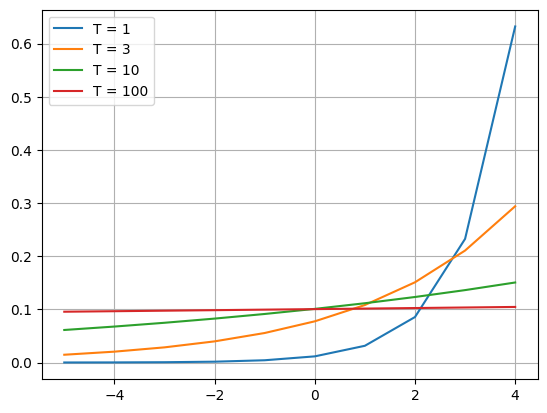

In [380]:
import matplotlib.pyplot as plt

def softmax_temp(x, t= 1):
    e_x = np.exp(x / t)
    return e_x / sum(e_x)

n_values = np.arange(-5, 5, 1)

plt.plot(n_values, softmax_temp(n_values, 1), label= 'T = 1')
plt.plot(n_values, softmax_temp(n_values, 3), label= 'T = 3')
plt.plot(n_values, softmax_temp(n_values, 10), label= 'T = 10')
plt.plot(n_values, softmax_temp(n_values, 100), label= 'T = 100')
plt.grid(True)
plt.legend()
plt.show()

In [381]:
from copy import deepcopy

#BASE_PROB_PROCREATE = 0.0075
def probability_function_procreation(n):
    return 15 / (pow(n, 2) - n)
    #k = 0.02
    #return 0.02 / (1 + np.exp(k * (n - 100)))

def procreate_1(p1, p2, c1, c2, id):
    
    W1 = p1.get_weights()
    b1 = p1.get_biases()
    W2 = p2.get_weights()
    b2 = p2.get_biases()

    W3 = deepcopy(W1)
    b3 = deepcopy(b1)

    c = c1 / (c1 + c2)

    for i in range(3):
        for j in range(5):
            if c < np.random.random():
                W3[i, j] = W2[i, j]
                b3[i, j] = b2[i, j]

    return MyPlayer(id, heritage= (W3, b3))

def procreate_2(p1, p2, c1, c2, id):
    
    W1 = p1.get_weights()
    b1 = p1.get_biases()
    W2 = p2.get_weights()
    b2 = p2.get_biases()

    W3 = deepcopy(W1)
    b3 = deepcopy(b1)

    c = c1 / (c1 + c2)

    for i in range(3):
        if c < np.random.random():
            W3[i] = W2[i]
            b3[i] = b2[i]

    return MyPlayer(id, heritage= (W3, b3))

def procreate_3(p1, p2, c1, c2, id):
    
    W1 = p1.get_weights()
    b1 = p1.get_biases()
    W2 = p2.get_weights()
    b2 = p2.get_biases()

    W3 = deepcopy(W1)
    b3 = deepcopy(b1)

    c = c1 / (c1 + c2)

    for j in range(5):
        if c < np.random.random():
            W3[:, j] = W2[:, j]
            b3[:, j] = b2[:, j]

    return MyPlayer(id, heritage= (W3, b3))

def procreation(population, id_generator):

    min_score = 10000
    max_score = -10000
    for p in population:
        score = p.get_fitness()
        if score < min_score: min_score = score
        if score > max_score: max_score = score

    mod_scores = []
    for p in population:
        mod_scores.append((p.get_fitness() - min_score) / (max_score - min_score))

    procreation_prob = probability_function_procreation(len(population))

    childrens = []
    for i, pi in enumerate(population):
        for j, pj in enumerate(population):
            if i != j:
                if mod_scores[i] * mod_scores[j] * procreation_prob >= np.random.random():
                    rand = np.random.random()
                    if 0.33 >= rand:
                        childrens.append(procreate_1(pi, pj, mod_scores[i], mod_scores[j], id_generator.get_id()))
                    elif 0.66 >= rand:
                        childrens.append(procreate_2(pi, pj, mod_scores[i], mod_scores[j], id_generator.get_id()))
                    else:
                        childrens.append(procreate_3(pi, pj, mod_scores[i], mod_scores[j], id_generator.get_id()))

    return childrens

def softmax_temp(x, t= 1):
    e_x = np.exp(x / t)
    return e_x / sum(e_x)

def procreation(population, id_generator):
        
    mod_scores = softmax_temp(np.array([p.get_fitness() for p in population]), 1000)
    
    parents = []
    for _ in range(15):
        parents.append(np.random.choice([i for i in range(len(population))], size= (2,), replace= False, p= mod_scores))

    childrens = []
    for pair in parents:
        pi = population[pair[0]]
        pj = population[pair[1]]
        mod_i = mod_scores[pair[0]]
        mod_j = mod_scores[pair[1]]
        
        rand = np.random.random()
        if 0.33 >= rand:
            childrens.append(procreate_1(pi, pj, mod_i, mod_j, id_generator.get_id()))
        elif 0.66 >= rand:
            childrens.append(procreate_2(pi, pj, mod_i, mod_j, id_generator.get_id()))
        else:
            childrens.append(procreate_3(pi, pj, mod_i, mod_j, id_generator.get_id()))

    return childrens

In [382]:
P_MUTATE = 0.2
P_MUTATION = 0.1
MUTATION_STRENGTH = 0.1

def mutate_1(p, id):

    Wm = deepcopy(p.get_weights())
    bm = deepcopy(p.get_biases())

    for i in range(3):
        for j in range(5):
            for ii in range(Wm[i, j].shape[0]):

                for jj in range(Wm[i, j].shape[1]):
                    if P_MUTATION >= np.random.random():
                        Wm[i, j][ii, jj] += np.random.normal(0, MUTATION_STRENGTH, size= Wm[i, j][ii, jj].shape)

                if P_MUTATION >= np.random.random():
                    bm[i, j][ii] += np.random.normal(0, MUTATION_STRENGTH, size= bm[i, j][ii].shape)

    return MyPlayer(id, heritage= (Wm, bm))

def mutate_2(p, id):

    Wm = deepcopy(p.get_weights())
    bm = deepcopy(p.get_biases())

    for i in range(3):
        for j in range(5):
            if P_MUTATION >= np.random.random():
                Wm[i, j] += np.random.normal(0, MUTATION_STRENGTH, size= Wm[i, j].shape)
            if P_MUTATION >= np.random.random():
                bm[i, j] += np.random.normal(0, MUTATION_STRENGTH, size= bm[i, j].shape)

    return MyPlayer(id, heritage= (Wm, bm))

def mutation(population, id_generator):

    bases = np.random.choice([i for i in range(len(population))], size= (15,), replace= False)

    mutants = []
    for base in bases:
        p = population[base]
        rand = np.random.random()
        if 0.5 >= rand:
            mutants.append(mutate_1(p, id_generator.get_id()))
        else:
            mutants.append(mutate_2(p, id_generator.get_id()))

    return mutants

In [383]:
MAX_EPOCH = 10
MAX_POPULATION = 100

id_generator = ID_generator()

population = [MyPlayer(id_generator.get_id()) for _ in range(MAX_POPULATION)]

bests = []
id_bests = []
times_bests = []
total_score_bests = []
p0 = None
best_score = -99999
for epoch in range(MAX_EPOCH):

    print(f'------------------------------------\nepoch {epoch}')

    evaluate_population(population)

    print('end_ev_1')
    ##########################
    #evaluate_population_2(population)
    ##########################

    scores = np.array([p.get_fitness() for p in population])
    print(max(scores))

    idx_sort = np.argsort(scores)[::-1]
    scores = scores[idx_sort]
    print(scores[:10])
    population = [population[i] for i in idx_sort]
    print([p.get_id() for p in population[:10]])

    ## provare ad implementare morte dopo tot che non si è tra i primi tot

    ## magari aumentare e diminuire aumento popolazione in base a grandezza popolazione

    to_death = []
    for i, p in enumerate(population):
        bonus_epochs = 2 if i < MAX_POPULATION / 2 else None
        if p.get_death(bonus_epochs) == 0: to_death.append(p)
    for p in to_death: population.remove(p)

    #population = population[:MAX_POPULATION]

    if scores[0] >= best_score:
        best_score = scores[0]
        p0 = population[0]
        p0_id = p0.get_id()
        print(f'new best -> {p0_id} - {scores[0]}')
        if not p0_id in id_bests:
            bests.append(p0)
            id_bests.append(p0_id)
            times_bests.append(1)
            total_score_bests.append(scores[0])
        else:
            idx = np.argwhere(np.array(id_bests) == p0_id)
            print(idx)
            times_bests[idx[0][0]] += 1
            total_score_bests[idx[0][0]] += scores[0]
    
    ## chi procrea (di piu se piu scores?)

    ## procreazione (mixing con probabilita per scores riscalate tra 0 e 1?)

    print(f'before: {len(population)}')

    childrens = procreation(population, id_generator)
    print(f'n_childrens: {len(childrens)}')

    ## mutazioni (tante ma random su individui random)

    mutants = mutation(population, id_generator)
    print(f'n_mutants: {len(mutants)}')

    for child in childrens: population.append(child)
    for mutant in mutants: population.append(mutant)

    print(f'after: {len(population)}')

    #break

    ##

------------------------------------
epoch 0
end_ev_1
431
[ 431  328  226  191  139  129  -62 -127 -263 -326]
[14, 11, 65, 73, 74, 57, 1, 92, 41, 48]
new best -> 14 - 431
before: 100
n_childrens: 15
n_mutants: 15
after: 130
------------------------------------
epoch 1
end_ev_1
334
[ 334  176   24 -157 -216 -270 -272 -367 -409 -410]
[103, 48, 57, 71, 13, 73, 46, 5, 92, 74]
before: 130
n_childrens: 15
n_mutants: 15
after: 160
------------------------------------
epoch 2
end_ev_1
431
[431 386 330 273 232 230 178 136 127 -15]
[48, 143, 11, 139, 151, 135, 65, 58, 142, 144]
new best -> 48 - 431
before: 105
n_childrens: 15
n_mutants: 15
after: 135
------------------------------------
epoch 3
end_ev_1
425
[425 421 421 381 378 375 323 321 288 282]
[11, 143, 135, 1, 176, 48, 92, 163, 134, 168]
before: 99
n_childrens: 15
n_mutants: 15
after: 129
------------------------------------
epoch 4
end_ev_1
432
[432 431 426 425 423 422 421 378 341 336]
[166, 204, 219, 164, 71, 135, 206, 102, 150, 176]
new

In [384]:
avg_scores = np.array(total_score_bests) / np.array(times_bests)
idx_sort = np.argsort(avg_scores)[::-1]

bests = [bests[i] for i in idx_sort]
avg_scores = [avg_scores[i] for i in idx_sort]
times_bests = [times_bests[i] for i in idx_sort]
print(avg_scores)
print(times_bests)

[438.0, 436.0, 435.0, 433.0, 432.0, 431.0, 431.0]
[1, 1, 1, 1, 1, 1, 1]


In [385]:
#ThePlayer = population[0]
ThePlayer = p0

In [386]:
wins_first = 0
wins_second = 0
n_trials = 1000

player1 = ThePlayer
player2 = RandomPlayer()

for _ in range(n_trials):
    g = Game()

    player1.isFirst()
    player1.prepare_to_surrend(500)
    winner = g.play(player1, player2)

    if winner == 0: wins_first += 1

    player1.isSecond()
    player1.prepare_to_surrend(500)
    winner = g.play(player2, player1)

    if winner == 1: wins_second += 1

print(f"Player won {wins_first} / {n_trials} as first")
print(f"Player won {wins_second} / {n_trials} as second")

Player won 842 / 1000 as first
Player won 200 / 1000 as second


In [203]:
if __name__ == '__main__':
    g = Game()
    g.print()
    player1 = MyPlayer()
    player2 = RandomPlayer()
    winner = g.play(player1, player2)
    g.print()
    print(f"Winner: Player {winner}")

[[-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
move is ok - award
move is ok - award
move is ok - award
move is ok - award
move is ok - award
random used - penalty
random used - penalty
move is ok - award
move is ok - award
random used - penalty
move is ok - award
move is ok - award
move is ok - award
[[ 0  1  0  1  1]
 [ 0 -1  1 -1  0]
 [ 0  0 -1  1 -1]
 [ 0 -1  1 -1 -1]
 [ 0  1 -1  1  1]]
Winner: Player 0
